In [7]:
import cv2
from matplotlib import pyplot as plt

In [8]:
current_image = cv2.imread('HawkesBay.jpeg',0)
cv2.imshow('Greyscale Image', current_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

print('Done showing image')

Done showing image


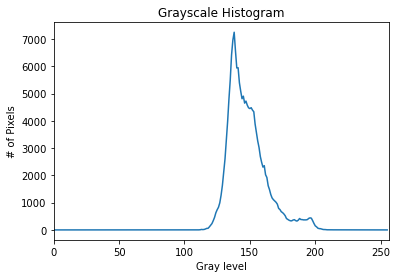

[5938.]


In [33]:
hist = cv2.calcHist([current_image], [0], None, [256], [0,256])
# print(hist)
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Gray level")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()


In [64]:
# equilized_image = cv2.equalizeHist(current_image)
def get_length(a):
    return int(a[0])
np = map(get_length,hist)

np = list(np)
print(len(np))
s = []
sum_of_prob_r = 0
sum_of_all_pixels = sum(np)

max_intensity = len(np) - 1
for i in range(len(np)):
    prob_of_r = np[i]/sum_of_all_pixels
    sum_of_prob_r += prob_of_r
#     print('nk = ' + str(np[i]) + '\trk = ' + str(i) + '\tp(rk) = ' + str(prob_of_r))
    s.append(max_intensity * sum_of_prob_r)
    
rounded_s = [int(round(num)) for num in s]
print(rounded_s)
print('=================================================================')
print(np)

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 4, 5, 7, 9, 11, 14, 18, 23, 29, 36, 44, 53, 63, 74, 83, 92, 101, 108, 116, 123, 130, 137, 144, 150, 157, 163, 170, 176, 182, 188, 193, 198, 202, 206, 210, 213, 217, 220, 223, 225, 227, 229, 231, 232, 234, 235, 237, 238, 239, 240, 241, 242, 242, 243, 244, 244, 245, 245, 246, 246, 247, 247, 248, 248, 249, 249, 250, 250, 251, 252, 252, 253, 253, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

In [98]:
def get_number_of_pixels_per_intensity(intensities_ptr, new_np):
    sum = 0
    intensities_ptr.append(rounded_s[0])
    for i in range(len(rounded_s)):
        if i == len(rounded_s) - 1:
            new_np.append(sum)
            break
        if rounded_s[i] in intensities_ptr:            
            sum += np[i]
        else:
            intensities_ptr.append(rounded_s[i])
            new_np.append(sum)
            sum = np[i]

In [99]:
intensities_ptr = []
new_np = []
get_number_of_pixels_per_intensity(intensities_ptr, new_np)
print(sum(new_np))
print(len(new_np))
print(len(intensities_ptr))

175104
69
69
